In [1]:
import musicdb
import matplotlib.pyplot as plt

db = musicdb.MusicDB()

Database musicdbn has already been existed.
Table echonest has already been existed.
Table echofilter has already been existed.
Table millionsonglink has already been existed.
Table spotify has already been existed.
Table songs has already been existed.


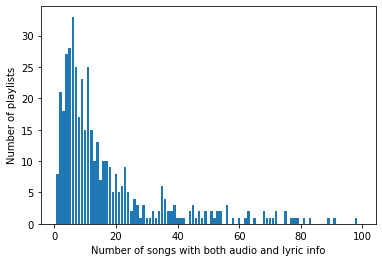

In [2]:
def visualize_echo_nest():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.echo_nest_table_name)
    query_cmd = "audio_lyric>={} and audio_lyric<{}"
    count = None
    pos = 1
    count_list = []
    pos_list = []
    while count is None or pos < 100:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Number of songs with both audio and lyric info')
    plt.ylabel('Number of playlists')
    plt.show()
        
visualize_echo_nest()

In [3]:
# Get a counter by setting a threshold
def echo_nest_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio_lyric>{}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {}".format(db.echo_nest_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) playlists with over {} audio and lyric".format(count, float(count/count_all)*100, thres))
    
echo_nest_counter(5)
echo_nest_counter(10)
echo_nest_counter(15)
echo_nest_counter(20)

There are 350 (76.25272331154684 %) playlists with over 5 audio and lyric
There are 237 (51.633986928104584 %) playlists with over 10 audio and lyric
There are 167 (36.38344226579521 %) playlists with over 15 audio and lyric
There are 125 (27.233115468409586 %) playlists with over 20 audio and lyric


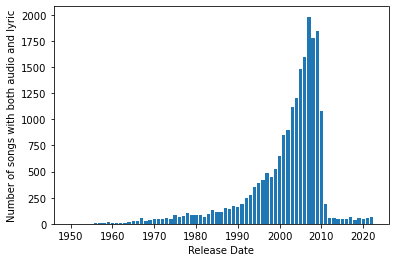

In [4]:
# visualize song table
def visualize_song_table():
    sql_cmd_base = "SELECT COUNT(*) FROM {} WHERE ".format(db.song_table_name)
    query_cmd = "release_date>='{}-01-01' and release_date<'{}-01-01' and audio=1 and lyric=1 and is_spotify=0"
    count = None
    pos = 1950
    count_list = []
    pos_list = []
    while count is None or pos < 2023:
        sql_cmd = sql_cmd_base + query_cmd.format(pos, pos + 1)
        my_cursor = db.execute_cmd(sql_cmd)
        for row in my_cursor:
            count = row[0]
            break
        count_list.append(count)
        pos_list.append(pos)
        pos += 1
        
    #print(count_list)
    #print(pos_list)
    
    # Plot
    plt.bar(pos_list, count_list)
    plt.xlabel('Release Date')
    plt.ylabel('Number of songs with both audio and lyric')
    plt.show()

visualize_song_table()

In [7]:
# Get a counter by setting a threshold
def song_table_counter(thres):
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE release_date>'{}-01-01' and audio=1 and lyric=1 and is_spotify=0".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    count = 0
    for row in my_cursor:
        count = row[0]
        break
    count_all = 0
    sql_cmd = "SELECT COUNT(*) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name, thres)
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        count_all = row[0]
        break
    print("There are {} ({} %) songs released after {}-01-01 with audio and lyric".format(count, float(count/count_all)*100, thres))

song_table_counter(2008)
song_table_counter(2009)
song_table_counter(2010)
song_table_counter(2011)
song_table_counter(2012)

There are 5291 (25.44116939943261 %) songs released after 2008-01-01 with audio and lyric
There are 3537 (17.007260662595566 %) songs released after 2009-01-01 with audio and lyric
There are 1765 (8.486800980910708 %) songs released after 2010-01-01 with audio and lyric
There are 752 (3.6159061403086987 %) songs released after 2011-01-01 with audio and lyric
There are 586 (2.8177140933788527 %) songs released after 2012-01-01 with audio and lyric


In [16]:
# Info report for song table
def get_counter(sql_cmd):
    my_cursor = db.execute_cmd(sql_cmd)
    for row in my_cursor:
        return row[0]

# Unreliable
def get_song_table_info():
    # Number of unique track id with valid audio and lyric
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1 and lang='en'".format(db.song_table_name)
    track_id_count_en = get_counter(sql_cmd)
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1".format(db.song_table_name)
    track_id_count = get_counter(sql_cmd)
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1 and lang='en' and json_length(genre_top)>0".format(db.song_table_name)
    track_id_valid_count = get_counter(sql_cmd)
    sql_cmd = "SELECT COUNT(DISTINCT trackid) FROM {} WHERE audio=1 and lyric=1 and lang='en' and json_length(genre_raw)>0".format(db.song_table_name)
    track_id_raw_count = get_counter(sql_cmd)
    print("There are {} song with audio and lyric in the dataset, {} English Song ({}%)".format(track_id_count, track_id_count_en,track_id_count_en*100/track_id_count))
    print("{} ({}%) valid songs with audio, lyric, English and genre top".format(track_id_valid_count, track_id_valid_count*100/track_id_count))
    print("{} ({}%) valid songs with audio, lyric, English and genre raw".format(track_id_raw_count, track_id_raw_count*100/track_id_count))
get_song_table_info()

There are 18984 song with audio and lyric in the dataset, 16044 English Song (84.51327433628319%)
14265 (75.14222503160556%) valid songs with audio, lyric, English and genre top
14265 (75.14222503160556%) valid songs with audio, lyric, English and genre raw


In [9]:
# find the intersection between music and lyric_raw folder
import os
dataset_root = 'E:/dataset/base'

def get_inter_music_lyric():
    music_path = dataset_root + '/' + 'music'
    lyric_path = dataset_root + '/' + 'lyric_raw'
    music_url_list = os.listdir(music_path)
    lyric_url_list = os.listdir(lyric_path)
    music_ids = [music.split('.')[0] for music in music_url_list]
    lyric_ids = [lyric.split('.')[0] for lyric in lyric_url_list]
    music_set = set(music_ids)
    lyric_set = set(lyric_ids)
    inter_set = music_set & lyric_set
    print("There are {} music and {} lyric, the intersection is {}".format(len(music_ids), len(lyric_ids), len(inter_set)))
    
get_inter_music_lyric()

There are 22041 music and 36239 lyric, the intersection is 19033
